In [1]:
import matplotlib.pyplot as plt
from scipy import stats

import numpy as np
import pandas as pd 

In [6]:
city_data = pd.read_csv("Pyber/raw_data/city_data.csv")
ride_data = pd.read_csv("Pyber/raw_data/ride_data.csv")
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [10]:
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [13]:
city_ride_data = pd.merge(city_data,ride_data,on="city",how='outer')
city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [100]:
#Average Fare ($) Per City
grouped_city = city_ride_data.groupby(['city']).mean()
mean_fare = grouped_city['fare']
mean_fare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [77]:
#* Total Number of Rides Per City
total_rides_per_city = city_ride_data["city"].value_counts()
total_rides_per_city.head()

Port James       64
Swansonbury      34
Port Johnstad    34
South Louis      32
West Peter       31
Name: city, dtype: int64

In [107]:
#Total Number of Drivers Per City
total_driver_per_city = grouped_city['driver_count']
total_driver_per_city.head()
#total_driver_df = pd.DataFrame(total_driver_per_city)
#total_driver_df.head()

city
Alvarezhaven    21.0
Alyssaberg      67.0
Anitamouth      16.0
Antoniomouth    21.0
Aprilchester    49.0
Name: driver_count, dtype: float64

In [129]:
#City Type (Urban, Suburban, Rural)
city_type = city_ride_data.groupby(['city','type']).count()
city_type_reset = city_type.reset_index(['city','type'])
type_s = city_type_reset['type'].head()
#city_type_data = city_type_reset[['city','type']]
#type_df = pd.DataFrame(city_type_data)
#type_df.head()
#city_type_data.head()

0       Urban
1       Urban
2    Suburban
3       Urban
4       Urban
Name: type, dtype: object

In [ ]:
#bublle chart 
#x=
#y=

In [145]:
#pie chart 
#% of Total Fares by City Type
total_data = city_ride_data.groupby(['type']).sum()
total_fares = total_data['fare']
total_fares.head()

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

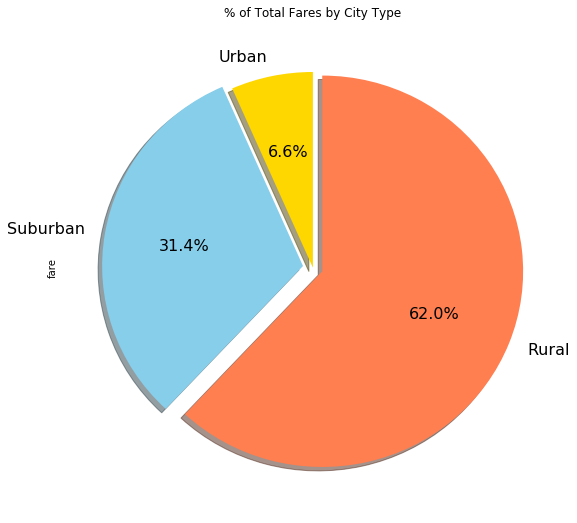

In [209]:
explode = [0,0.05,0.05]
labels = ['Urban', 'Suburban','Rural']
colors = ['Gold','SkyBlue','Coral']

fare_pie = total_fares.plot(kind='pie', labels=labels, shadow=True,
                            colors=colors, explode=explode, autopct='%1.1f%%',
                            startangle=90,figsize=(9,9),fontsize=16)

plt.ylabel=(" ")
fare_pie.set_title("% of Total Fares by City Type")

plt.savefig("TotalFaresPie.png")
plt.show()

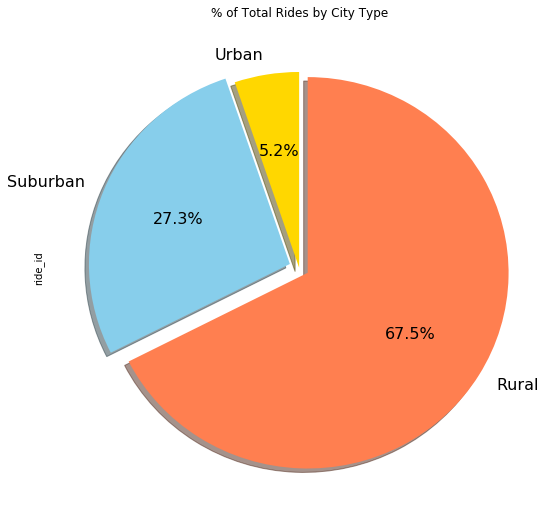

In [206]:
#pie chart 
#% of Total Rides by City Type
total_data = city_ride_data.groupby(['type']).count()
total_rides = total_data['ride_id']

explode = [0,0.05,0.05]
labels = ['Urban', 'Suburban','Rural']
colors = ['Gold','SkyBlue','Coral']

fare_pie = total_rides.plot(kind='pie', labels=labels, shadow=True,
                            colors=colors, explode=explode, autopct='%1.1f%%',
                            startangle=90,figsize=(9,9), fontsize=16)
plt.ylabel=(" ")
fare_pie.set_title("% of Total Rides by City Type")

plt.savefig("TotalRidesPie.png")
plt.show()

<function matplotlib.pyplot.show>

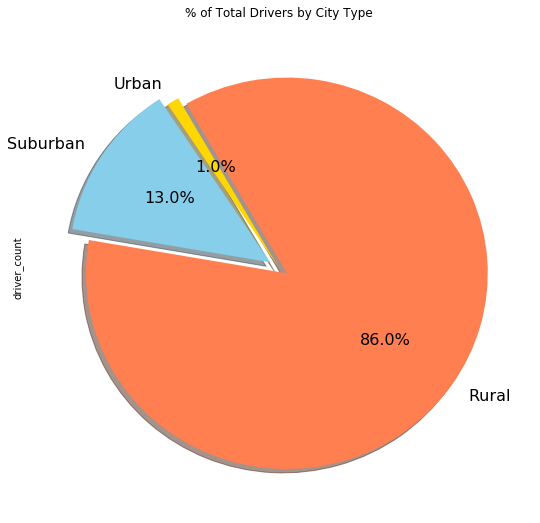

In [208]:
#pie chart 
#% of Total Drivers by City Type
grouped_type = city_ride_data.groupby(['type'])
total_drivers = grouped_type['driver_count'].sum()

explode = [0,0.05,0.05]
labels = ['Urban', 'Suburban','Rural']
colors = ['Gold','SkyBlue','Coral']

fare_pie = total_drivers.plot(kind='pie', labels=labels, shadow=True,
                            colors=colors, explode=explode, autopct='%1.1f%%',
                            startangle=120,figsize=(9,9), fontsize=16)

fare_pie.set_title("% of Total Drivers by City Type")


plt.savefig("TotalDriversPie.png")
plt.show